In [24]:
import andes
import matplotlib.pyplot as plt

In [25]:
dir_path = os.path.abspath('..')
case_path = '/case/ieee39_ev2.xlsx'
case = dir_path + case_path
ss1 = andes.load(case,
                 setup=False,
                 no_output=True,
                 default_config=False)

ss2 = andes.load(case,
                 setup=False,
                 no_output=True,
                 default_config=False)

ss1.add("Toggler", dict(model='SynGen', dev="GENROU_2", t=1.0))
ss2.add("Toggler", dict(model='SynGen', dev="GENROU_2", t=1.0))

ss1.setup()
ss2.setup()

gov_idx = ss1.TGOV1N.idx.v

ss1.TGOV1N.set(src='T1', attr='v', value=[0.01] * len(gov_idx), idx=gov_idx)
# ss1.TGOV1N.set(src='T2', attr='v', value=[1.5] * len(gov_idx), idx=gov_idx)
# ss1.TGOV1N.set(src='T3', attr='v', value=[5] * len(gov_idx), idx=gov_idx)

ss1.TDS.config.criteria = 0
ss2.TDS.config.criteria = 0

Generating code for 1 models on 6 processes.
Generating code for 1 models on 6 processes.


In [26]:
ss1.PFlow.run()
ss2.PFlow.run()
ss1.TDS.run()
ss2.TDS.run()

GENROU (xl <= xd2) out of typical upper limit.

   idx     | values | limit
-----------+--------+------
 GENROU_1  | 0.014  | 0.001
 GENROU_3  | 0.018  | 0.003
 GENROU_4  | 0.013  | 0.001
 GENROU_5  | 0.014  | 0.001
 GENROU_7  | 0.015  | 0.002
 GENROU_8  | 0.015  | 0.006
 GENROU_9  | 0.009  | 0.001
 GENROU_10 | 0.013  | 0.000




  0%|          | 0/100 [00:00<?, ?%/s]

<Toggler Toggler_2>: SynGen.GENROU_2 status changed to 0 at t=1.0 sec.


GENROU (xl <= xd2) out of typical upper limit.

   idx     | values | limit
-----------+--------+------
 GENROU_1  | 0.014  | 0.001
 GENROU_3  | 0.018  | 0.003
 GENROU_4  | 0.013  | 0.001
 GENROU_5  | 0.014  | 0.001
 GENROU_7  | 0.015  | 0.002
 GENROU_8  | 0.015  | 0.006
 GENROU_9  | 0.009  | 0.001
 GENROU_10 | 0.013  | 0.000




  0%|          | 0/100 [00:00<?, ?%/s]

<Toggler Toggler_2>: SynGen.GENROU_2 status changed to 0 at t=1.0 sec.


True

(<Figure size 500x400 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

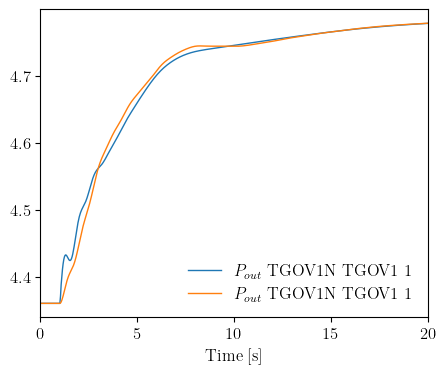

In [27]:
fig, ax = plt.subplots(figsize=(5, 4))
ss1.TDS.plt.plot(ss1.TGOV1N.pout, a=(0),
                 ax=ax, fig=fig, show=False)
ss2.TDS.plt.plot(ss2.TGOV1N.pout, a=(0),
                 ax=ax, fig=fig, show=False)